In [5]:
import numpy as np

#湿度 高-1 正常-0 云量多云-1 少云-0 风力小-0 中-1 大-2 天色阴暗-1 明亮-0
train_data = []
train_oc = []       #train_outcome


#读取文本信息
f = open('tianqi.txt','r')
for line in f.readlines():
    tmp = line.strip().split(' ')
    line_of_data = []
    for i in tmp:
        line_of_data.append(float(i))
    label = line_of_data.pop()
    train_data.append(np.array(line_of_data))
    train_oc.append(label)
train_oc = np.array(train_oc)
print(train_data)
print(train_oc)


[array([1., 1., 0., 0.]), array([0., 1., 1., 1.]), array([1., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 1., 1., 0.]), array([1., 1., 1., 1.]), array([1., 0., 2., 1.]), array([0., 1., 0., 1.]), array([0., 0., 1., 0.]), array([0., 1., 2., 0.]), array([0., 0., 0., 1.]), array([0., 0., 2., 0.])]
[1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.]


贝叶斯公式：

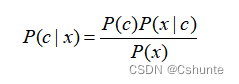 

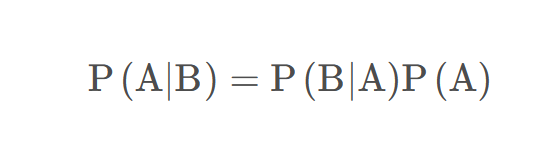

属性条件独立：

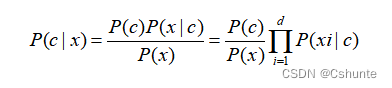

多项式朴素贝叶斯：

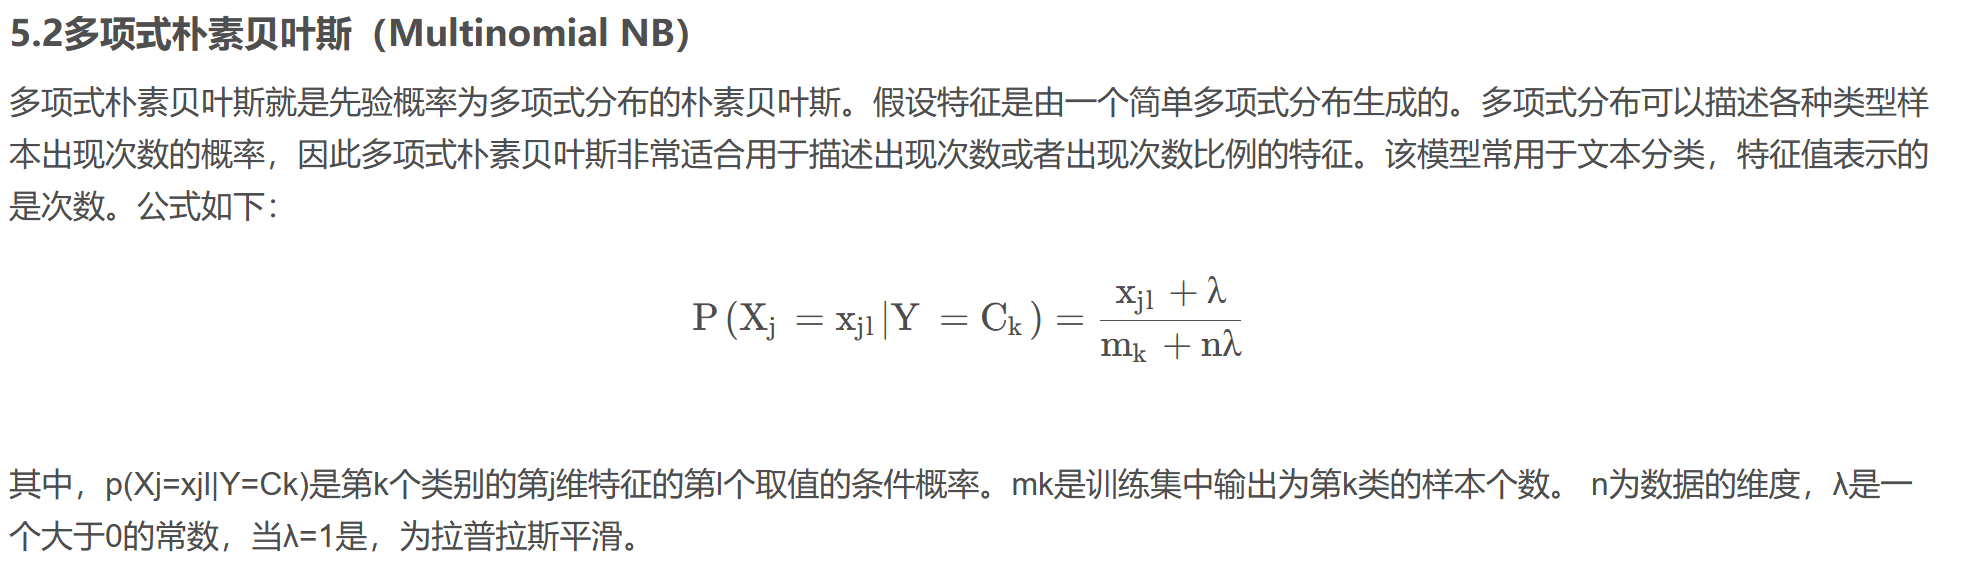

In [6]:
#训练，即根据测试样本求出每个特征的先验概率
data_size = len(train_data)
feature_size = len(train_data[0])
lamda = 1
#一是样本数量 一是每个样本特征的数量
print(data_size, " ", feature_size)

#求得P(B)
p1 = sum(train_oc)/data_size        #下雨的概率
p0 = 1 - p1 #不下雨的概率
print(p1, " ", p0)
#P(Bi and 下雨)
pAB = []
for j in range(3): 
    #print(j)
    i = 0
    cnt = [0,0,0,0]
    for data in train_data:
        if data[0]==j and train_oc[i] ==1:
            cnt[0] = cnt[0] + 1
        if data[1]==j and train_oc[i] ==1:
            cnt[1] = cnt[1] + 1
        if data[2]==j and train_oc[i] == 1:
            cnt[2] = cnt[2] + 1
        if data[3]==j and train_oc[i] == 1:
            cnt[3] = cnt[3] + 1
        i = i + 1
    #print(cnt)
    for k in range(feature_size):
        cnt[k] = cnt[k]/data_size
    pAB.append(np.array(cnt))
    #print(cnt)
#pB 是一个存储各个先验概率的矩阵
print(np.transpose(pAB))

#利用条件概率公式求出P(A|B) = P(AB)/P(B)        B表示下雨 C表示不下雨
pA_B = []
pA_C = []
for data in pAB:
    pa_b = []
    pa_c = []
    for i in range(feature_size):
        #采用多项式朴素贝叶斯方法-n=1-拉普拉斯平滑
        pa_b.append((1-data[i]+lamda)/(1-p1+lamda*2))   #data[0]是
        pa_c.append((data[i]+lamda)/(p1+lamda*2))
    pA_B.append(np.array(pa_b))         
    pA_C.append(np.array(pa_c))
    #pA_B.append(pa_b)
    #pA_C.append(pa_c)
pA_B = np.transpose(pA_B)
pA_C = np.transpose(pA_C)
print(pA_B)
print(pA_C)


12   4
0.5   0.5
[[0.25       0.25       0.        ]
 [0.16666667 0.33333333 0.        ]
 [0.16666667 0.16666667 0.16666667]
 [0.16666667 0.33333333 0.        ]]
[[0.7        0.7        0.8       ]
 [0.73333333 0.66666667 0.8       ]
 [0.73333333 0.73333333 0.73333333]
 [0.73333333 0.66666667 0.8       ]]
[[0.5        0.5        0.4       ]
 [0.46666667 0.53333333 0.4       ]
 [0.46666667 0.46666667 0.46666667]
 [0.46666667 0.53333333 0.4       ]]


至此，我们已经求得概率矩阵pA_B

接下来带入测试数据进行预测即可

In [7]:
#由题意，测试数据为 高湿度、多云、风力中、天色明亮

test = [1,1,1,0]
p1_t = p1
tmp = []
for i in range(feature_size):
    tmp = pA_B[i]
    p1_t *= tmp[test[i]]
    
p0_t = p0
for i in range(feature_size):
    tmp = pA_C[i]
    p0_t *= tmp[test[i]]

print("预测结果为下雨的概率为：%.4f"%p1_t)
print("预测结果为不下雨的概率为：%.4f"%p0_t)
if p1_t > p0_t:
    print("该天可能会下雨")
else:
    print("该天大概率不会下雨")



预测结果为下雨的概率为：0.1255
预测结果为不下雨的概率为：0.0290
该天可能会下雨
